In [1]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math




In [2]:
# Importing dataset
df=pd.read_csv('Datafiniti_Amazon.csv') 
print("Shape of data=>",df.shape)

#Reference:https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

Shape of data=> (34660, 21)


C:\Users\rifai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.corr()

In [4]:
#Selecting columns
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]


In [6]:
#Check for null values 
df.dropna(inplace=True)
df.isnull().sum()


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [118]:
#Word Count of each review
df['word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split(" ")))
df[['reviews.text','word_count']].head()

,reviews.text,word_count
0,this product so far has not disappointed my ch...,27
1,great for beginner or experienced person bough...,14
2,inexpensive tablet for him to use and learn on...,26
3,i have had my fire hd two weeks now and i lov...,118
4,i bought this for my grand daughter when she c...,117


In [119]:
#Average word count of each review

sum(df['word_count'])/len(df['reviews.text'])

30.053245358293694

,reviews.text,char_count
0,this product so far has not disappointed my ch...,141
1,great for beginner or experienced person bough...,74
2,inexpensive tablet for him to use and learn on...,125
3,i have had my fire hd two weeks now and i lov...,572
4,i bought this for my grand daughter when she c...,601


(array([2.3631e+04, 1.9830e+03, 2.8400e+02, 9.2000e+01, 3.5000e+01,
        2.2000e+01, 1.3000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([   0. ,  300.2,  600.4,  900.6, 1200.8, 1501. , 1801.2, 2101.4,
        2401.6, 2701.8, 3002. ]),
 <BarContainer object of 10 artists>)

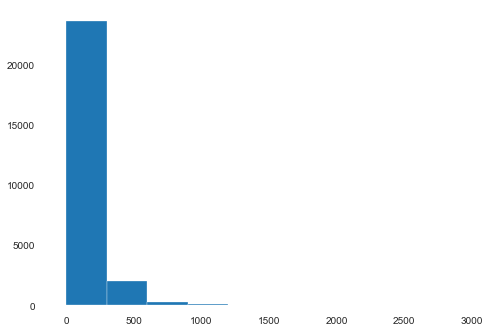

In [122]:
#Character Count of each review
df['char_count'] = df['reviews.text'].str.len() ## this also includes spaces
df[['reviews.text','char_count']].head()
plt.hist(df['char_count'])
plt.show()

In [130]:
#Average Length of words in Review 0 
sum(len(df['reviews.text'][0]) for word in df['reviews.text'][0])/len(df['reviews.text'][0])

141.0

In [ ]:
#Average word size of each review

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['reviews.text'].apply(lambda x: avg_word(x))
df[['reviews.text','avg_word']].head()

In [7]:
df['name'].unique()
print('Number of products=>',len(df['name'].unique()))

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\r\nAmazon Kindle Fire Hd (3rd Generation) 8gb,,,',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Black, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon - Kindle Voyage - 4GB - Wi-Fi 

Number of products=> 44


In [8]:
# Keep products which have a count more than 500 
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 8


In [9]:
#Convert columns to int so they can be used to build a model later 
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [ ]:
#Cleaning Data


In [10]:
df['name'].unique()


array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [15]:
# Remove ,,, from entries in name column
df['name'] = df['name'].str.replace(r'\,,,','')

df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)\r\nEcho (White)', 'Amazon Fire Tv\r\nAmazon Fire Tv'],
      dtype=object)

In [20]:
#Check reviews. text column
print(df['reviews.text'][0])

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.


In [25]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1
    


Review Number  0

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.

Review Number  1

great for beginner or experienced person. Bought as a gift and she loves it

Review Number  2

Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...

Review Number  3

I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuris

In [26]:
#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [27]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1
    

Review Number  0

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.

Review Number  1

great for beginner or experienced person. Bought as a gift and she loves it

Review Number  2

Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...

Review Number  3

I have had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futur

In [29]:
print(df['reviews.text'][0])

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.


In [32]:
df['reviews.text']=df['reviews.text'].str.lower()


In [33]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed. my c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd 8 two weeks now and i lo...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...,1,0
...,...,...,...,...
26063,Amazon Fire Tv\r\nAmazon Fire Tv,"it has many uses. you can listen to music, che...",1,0
26064,Amazon Fire Tv\r\nAmazon Fire Tv,"cost is not outrageous. easy setup, fun to use...",1,0
26065,Amazon Fire Tv\r\nAmazon Fire Tv,i knew about this from its crowd funding start...,1,1
26066,Amazon Fire Tv\r\nAmazon Fire Tv,this is a neat product but did not fit my need...,0,0


In [ ]:
#Alternative to lowercase letters
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [34]:
#Remove digits and words containing digits 
df['reviews.text']=df['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [35]:
#Remove Punctuations
df['reviews.text']=df['reviews.text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd  two weeks now and i lov...
4        i bought this for my grand daughter when she c...
                               ...                        
26063    it has many uses you can listen to music check...
26064    cost is not outrageous easy setup fun to use a...
26065    i knew about this from its crowd funding start...
26066    this is a neat product but did not fit my need...
26067    responses well and there are lots of skills to...
Name: reviews.text, Length: 26068, dtype: object

In [37]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1

Review Number  0

this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease

Review Number  1

great for beginner or experienced person bought as a gift and she loves it

Review Number  2

inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already

Review Number  3

i have had my fire hd  two weeks now and i love it this tablet is a great valuewe are prime members and that is where this tablet shines i love being able to easily access all of the prime content as well as movies you can download and watch laterthis has a  screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing  base model the build on this fire is insanely awesome running at only  thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands

Review N

In [47]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [59]:
Z=df['reviews.text']
print(Z)

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd  two weeks now and i lov...
4        i bought this for my grand daughter when she c...
                               ...                        
26063    it has many uses you can listen to music check...
26064    cost is not outrageous easy setup fun to use a...
26065    i knew about this from its crowd funding start...
26066    this is a neat product but did not fit my need...
26067    responses well and there are lots of skills to...
Name: reviews.text, Length: 26068, dtype: object


,reviews.text,stopwords
0,this product so far has not disappointed my ch...,14
1,great for beginner or experienced person bough...,7
2,inexpensive tablet for him to use and learn on...,16
3,i have had my fire hd two weeks now and i lov...,59
4,i bought this for my grand daughter when she c...,65


(array([2.3813e+04, 1.8310e+03, 2.7800e+02, 7.9000e+01, 3.5000e+01,
        1.8000e+01, 8.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([  0. ,  32.1,  64.2,  96.3, 128.4, 160.5, 192.6, 224.7, 256.8,
        288.9, 321. ]),
 <BarContainer object of 10 artists>)

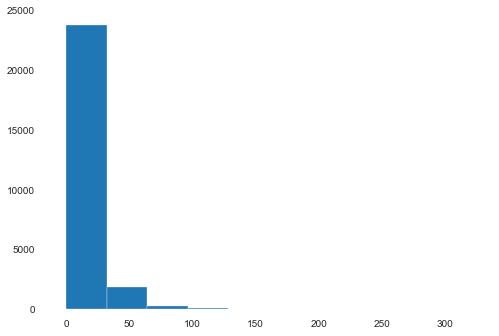

In [133]:
#check count of StopWords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['reviews.text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['reviews.text','stopwords']].head()

plt.hist(df['stopwords'])

plt.show()

In [135]:
#Commonly occuring words
freq = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
freq

the     30967
it      26429
and     24889
i       24612
to      24377
for     22080
is      20124
a       18974
my      13789
this    13251
dtype: int64

In [136]:
#removal of commonly occuring irrelevant words
freq = list(freq)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviews.text'].head()

0    this product so far has not disappointed my ch...
1    great for beginner or experienced person bough...
2    inexpensive tablet for him to use and learn on...
3    i have had my fire hd two weeks now and i love...
4    i bought this for my grand daughter when she c...
Name: reviews.text, dtype: object

In [138]:
#Count of rare words

freq_rare = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[-100:]
freq_rare

equates          1
handleability    1
wellis           1
pac              1
ialexa           1
                ..
predownloaded    1
itemlots         1
werr             1
proving          1
andenjoys        1
Length: 100, dtype: int64

In [139]:
#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviews.text'].head()

0    this product so far has not disappointed my ch...
1    great for beginner or experienced person bough...
2    inexpensive tablet for him to use and learn on...
3    i have had my fire hd two weeks now and i love...
4    i bought this for my grand daughter when she c...
Name: reviews.text, dtype: object

In [141]:
#Spell Correction(Time consuming), Try on first 5 reviews
from textblob import TextBlob
df['reviews.text_Corrected Spelling']=df['reviews.text'][1:5].apply(lambda x: str(TextBlob(x).correct()))
df.head(5)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,reviews.text.nostopwords,reviews.text.nostopwords.lemmatized,reviews.text.nostopwords.lemmatized2,reviews.text.nostopwords.LEMMATIZED,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,reading_time,word_count,char_count,stopwords,reviews.text_Corrected Spelling
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed my ch...,1,0,product far disappointed children love use lik...,"[product, far, disappointed, child, love, use,...","[product, far, disappointed, child, love, use,...",product far disappointed child love use like a...,-0.050000,8.48,60.99,15.24,7th and 8th grade,1.69,27,141,14,NaN
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person bough...,1,0,great beginner experienced person bought gift ...,"[great, beginner, experienced, person, bought,...","[great, beginner, experienced, person, bought,...",great beginner experienced person bought gift ...,0.700000,6.59,74.19,11.31,6th and 7th grade,0.90,14,74,7,great for beginner or experienced person bough...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet use learn step nabi thrille...,"[inexpensive, tablet, use, learn, step, nabi, ...","[inexpensive, tablet, use, learn, step, nabi, ...",inexpensive tablet use learn step nabi thrille...,0.600000,1.90,78.93,11.94,8th and 9th grade,1.47,26,125,16,expensive tablet for him to use and learn on s...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd two weeks now and i love...,1,0,fire hd two weeks love tablet great valuewe pr...,"[fire, hd, two, week, love, tablet, great, val...","[fire, hd, two, week, love, tablet, great, val...",fire hd two week love tablet great valuewe pri...,0.385556,11.23,-18.86,46.65,-1th and 0th grade,6.68,118,572,59,i have had my fire he two weeks now and i love...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...,1,0,bought grand daughter comes visit set user ent...,"[bought, grand, daughter, come, visit, set, us...","[bought, grand, daughter, come, visit, set, us...",bought grand daughter come visit set user ente...,0.351562,11.43,-20.89,48.12,44th and 45th grade,7.12,117,601,65,i bought this for my grand daughter when she c...


In [62]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['reviews.text.nostopwords'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)


                                                    name  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
...                                                  ...   
26063                   Amazon Fire Tv\r\nAmazon Fire Tv   
26064                   Amazon Fire Tv\r\nAmazon Fire Tv   
26065                   Amazon Fire Tv\r\nAmazon Fire Tv   
26066                   Amazon Fire Tv\r\nAmazon Fire Tv   
26067                   Amazon Fire Tv\r\nAmazon Fire Tv   

                                            reviews.text  reviews.doRecommend  \
0      this product so far has not disappointed my ch...                    1   
1      great for beginner or experienced person bough...                    1   
2      inexpensive tablet for him to

In [68]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['reviews.text.nostopwords.lemmatized2'] = df['reviews.text.nostopwords'].apply(lambda x:lemmatize_text(x))


In [69]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,reviews.text.nostopwords,reviews.text.nostopwords.lemmatized,reviews.text.nostopwords.lemmatized2
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed my ch...,1,0,product far disappointed children love use lik...,"[product, far, disappointed, child, love, use,...","[product, far, disappointed, child, love, use,..."
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person bough...,1,0,great beginner experienced person bought gift ...,"[great, beginner, experienced, person, bought,...","[great, beginner, experienced, person, bought,..."
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet use learn step nabi thrille...,"[inexpensive, tablet, use, learn, step, nabi, ...","[inexpensive, tablet, use, learn, step, nabi, ..."
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd two weeks now and i lov...,1,0,fire hd two weeks love tablet great valuewe pr...,"[fire, hd, two, week, love, tablet, great, val...","[fire, hd, two, week, love, tablet, great, val..."
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...,1,0,bought grand daughter comes visit set user ent...,"[bought, grand, daughter, come, visit, set, us...","[bought, grand, daughter, come, visit, set, us..."
...,...,...,...,...,...,...,...
26063,Amazon Fire Tv\r\nAmazon Fire Tv,it has many uses you can listen to music check...,1,0,many uses listen music check weather listen po...,"[many, us, listen, music, check, weather, list...","[many, us, listen, music, check, weather, list..."
26064,Amazon Fire Tv\r\nAmazon Fire Tv,cost is not outrageous easy setup fun to use a...,1,0,cost outrageous easy setup fun use syncs iphon...,"[cost, outrageous, easy, setup, fun, use, sync...","[cost, outrageous, easy, setup, fun, use, sync..."
26065,Amazon Fire Tv\r\nAmazon Fire Tv,i knew about this from its crowd funding start...,1,1,knew crowd funding start wish jumped board exc...,"[knew, crowd, funding, start, wish, jumped, bo...","[knew, crowd, funding, start, wish, jumped, bo..."
26066,Amazon Fire Tv\r\nAmazon Fire Tv,this is a neat product but did not fit my need...,0,0,neat product fit needsi several bluetooth devi...,"[neat, product, fit, needsi, several, bluetoot...","[neat, product, fit, needsi, several, bluetoot..."


In [74]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [78]:
#Counting number of words using TextBlob
from textblob import TextBlob
TextBlob(df['reviews.text.nostopwords'][1]).word_counts


defaultdict(int,
            {'great': 1,
             'beginner': 1,
             'experienced': 1,
             'person': 1,
             'bought': 1,
             'gift': 1,
             'loves': 1})

In [79]:
#Lemmatization

from textblob import Word
df['reviews.text.nostopwords.LEMMATIZED'] = df['reviews.text.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews.text.nostopwords.LEMMATIZED'].head()

0    product far disappointed child love use like a...
1    great beginner experienced person bought gift ...
2    inexpensive tablet use learn step nabi thrille...
3    fire hd two week love tablet great valuewe pri...
4    bought grand daughter come visit set user ente...
Name: reviews.text.nostopwords.LEMMATIZED, dtype: object

In [81]:
#n-gram using TextBlob

TextBlob(df['reviews.text.nostopwords.LEMMATIZED'][0]).ngrams(3)

[WordList(['product', 'far', 'disappointed']),
 WordList(['far', 'disappointed', 'child']),
 WordList(['disappointed', 'child', 'love']),
 WordList(['child', 'love', 'use']),
 WordList(['love', 'use', 'like']),
 WordList(['use', 'like', 'ability']),
 WordList(['like', 'ability', 'monitor']),
 WordList(['ability', 'monitor', 'control']),
 WordList(['monitor', 'control', 'content']),
 WordList(['control', 'content', 'see']),
 WordList(['content', 'see', 'ease'])]

In [82]:
#Scikit learn implementation(Tfidf vectorizer)

from sklearn.feature_extraction.text import TfidfVectorizer


In [83]:
#TFID BOW Vectorizer

vec_idf=TfidfVectorizer()

In [84]:
#Fitting the vectorizer on the data to create vocabulary

w=vec_idf.fit(df['reviews.text.nostopwords.LEMMATIZED'])

In [87]:
#Vocabulary 

vec_idf.vocabulary_

{'product': 8818,
 'far': 4058,
 'disappointed': 3052,
 'child': 1929,
 'love': 6748,
 'use': 12164,
 'like': 6571,
 'ability': 10,
 'monitor': 7217,
 'control': 2385,
 'content': 2360,
 'see': 9963,
 'ease': 3391,
 'great': 4940,
 'beginner': 1150,
 'experienced': 3919,
 'person': 8313,
 'bought': 1442,
 'gift': 4700,
 'inexpensive': 5676,
 'tablet': 11156,
 'learn': 6434,
 'step': 10764,
 'nabi': 7408,
 'thrilled': 11547,
 'skype': 10319,
 'already': 412,
 'fire': 4225,
 'hd': 5169,
 'two': 11908,
 'week': 12548,
 'valuewe': 12258,
 'prime': 8761,
 'member': 6986,
 'shine': 10130,
 'able': 14,
 'easily': 3402,
 'access': 50,
 'well': 12573,
 'movie': 7291,
 'download': 3257,
 'watch': 12493,
 'laterthis': 6396,
 'screen': 9895,
 'really': 9225,
 'nice': 7556,
 'look': 6706,
 'crisp': 2557,
 'bright': 1495,
 'infact': 5681,
 'brighter': 1497,
 'ipad': 5897,
 'pro': 8783,
 'costing': 2470,
 'base': 1043,
 'model': 7179,
 'build': 1578,
 'insanely': 5731,
 'awesome': 925,
 'running': 97

In [88]:
#TFIDF Score calculation
#Output would be sparse matrix with TFIDF score calculation 

z=w.transform(df['reviews.text.nostopwords.LEMMATIZED'])

In [89]:
#Converting sparse matrix into array

print(z.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Document Term Matrix (Another Approach)

In [97]:
# Group stopwords and lemmatized reviews according to products
df_grouped=df[['name','reviews.text.nostopwords.LEMMATIZED']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped

,reviews.text.nostopwords.LEMMATIZED
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappointed child love use like a...
Amazon Fire Tv\r\nAmazon Fire Tv,echo learning everyday us daily use place spea...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish would investigated l...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,best value money hand work perfectly purchased...
Echo (White)\r\nEcho (White),although competing ipad higher end android tab...
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",tablet light stream well use stream movie much...
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",sale people really nice knowledgeable come bac...
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,",much better original kindle lighter easier rea...


In [99]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['reviews.text.nostopwords.LEMMATIZED'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

In [100]:
df_dtm.head(3)

,aa,aaa,aamazon,abandon,abandoned,abattery,abc,abcmouse,abcmousecom,abd,...,zigbee,zinio,zip,zippy,zone,zoo,zoom,zoomed,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Amazon Fire Tv\r\nAmazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,2,0,2,0,0,0


# Exploratory Analysis

In [102]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


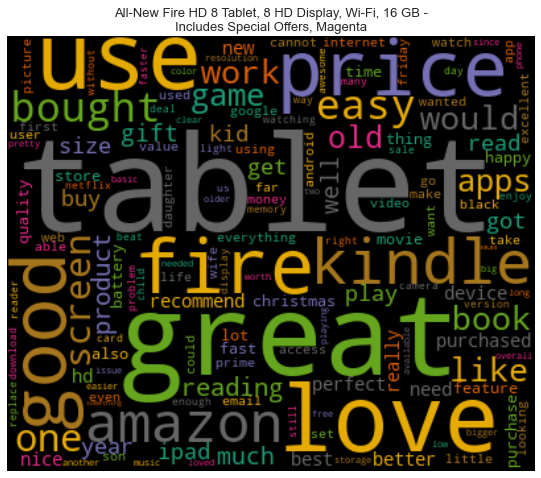

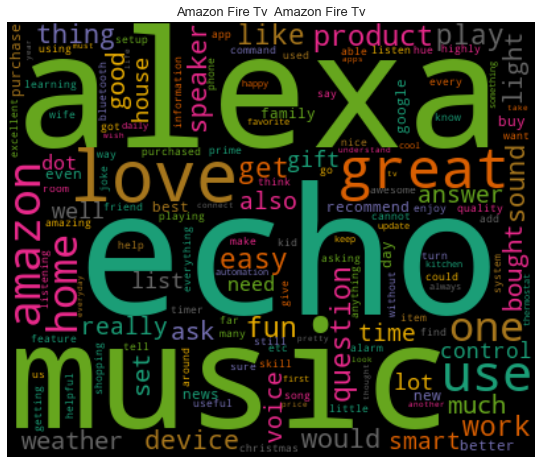

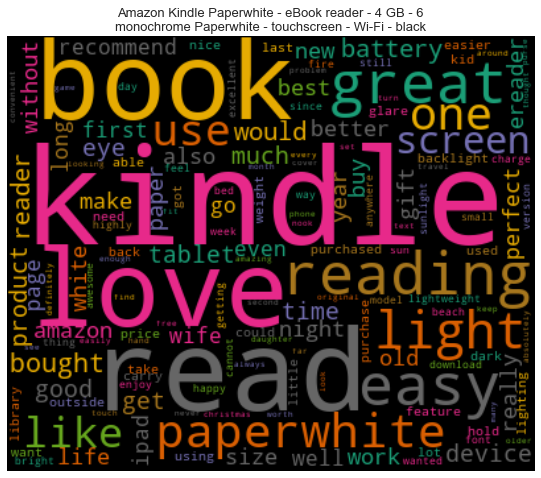

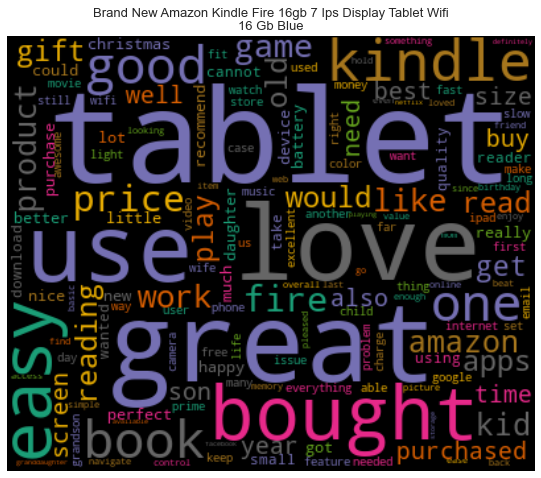

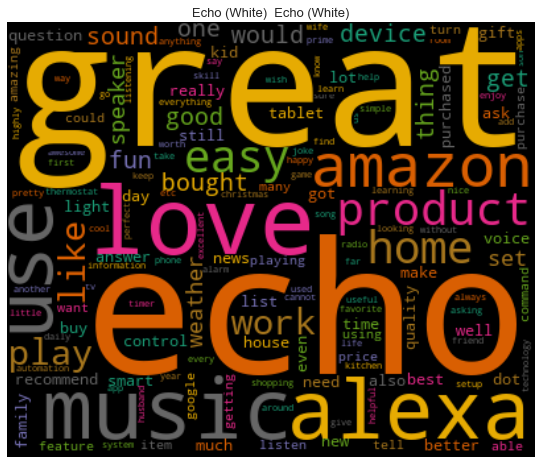

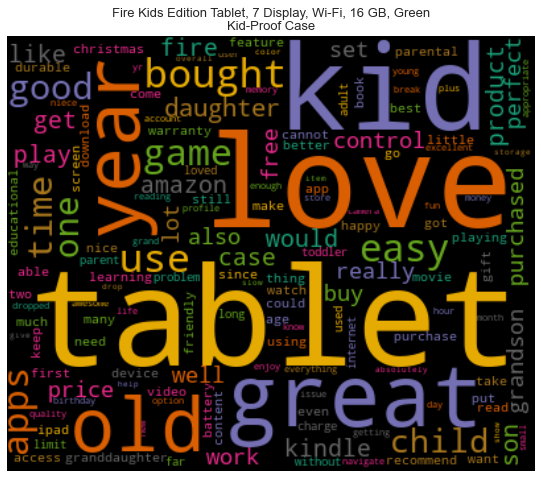

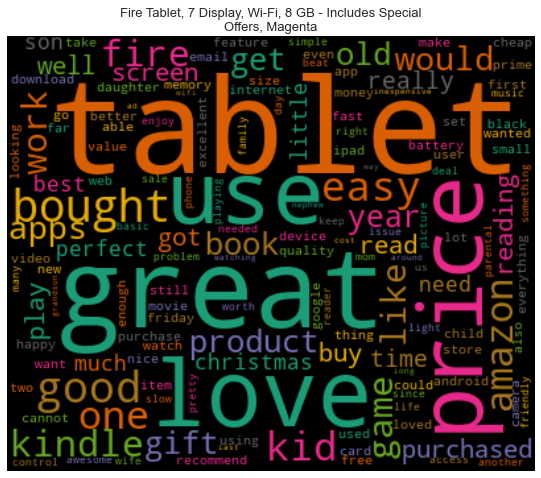

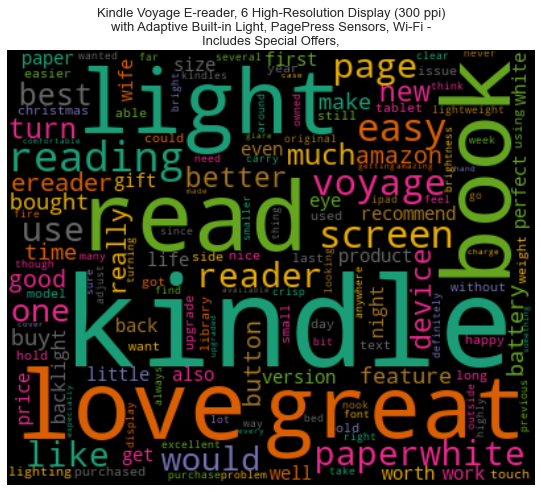

In [103]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Sentiment Analysis

In [105]:
from textblob import TextBlob
df['polarity']=df['reviews.text.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [106]:
#Reviews with Highest Polarity 
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 if you never thought about getting a echo you should now because this is the best thing since sliced bread
Review 2:
 one of the best tablets on the market for its value
Review 3:
 i use this for listening to music controlling my home and setting the best alarms even my friends are amazed with my setup


In [107]:
#Reviews with Lowest Polarity 
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 one of the worst purchases or investments you could make for technology
Review 2:
 bought it so my son would stop grabbing for my phone does what it needs to but battery life is horrible
Review 3:
 i hate it there is not any organization for the apps


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Products')

Text(0.5, 1.0, 'Polarity of Different Amazon Product Reviews')

Text(0.005, -0.05491950290625042, 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,')

Text(0.005, 0.9512317430856198, 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case')

Text(0.005, 1.964477032975155, 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black')

Text(0.005, 2.968776776969821, 'Amazon Fire Tv\r\nAmazon Fire Tv')

Text(0.005, 3.9717237956195475, 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')

Text(0.005, 4.971959798770275, 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue')

Text(0.005, 5.9741690385954875, 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta')

Text(0.005, 6.980660889676817, 'Echo (White)\r\nEcho (White)')

Text(0.3460804970937496, -0.05491950290625042, '0.345')

Text(0.3522317430856198, 0.9512317430856198, '0.351')

Text(0.3654770329751551, 1.964477032975155, '0.364')

Text(0.3697767769698208, 2.968776776969821, '0.369')

Text(0.37272379561954727, 3.9717237956195475, '0.372')

Text(0.3729597987702749, 4.971959798770275, '0.372')

Text(0.3751690385954883, 5.9741690385954875, '0.374')

Text(0.3816608896768171, 6.980660889676817, '0.381')

([], [])

C:\Users\rifai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rifai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


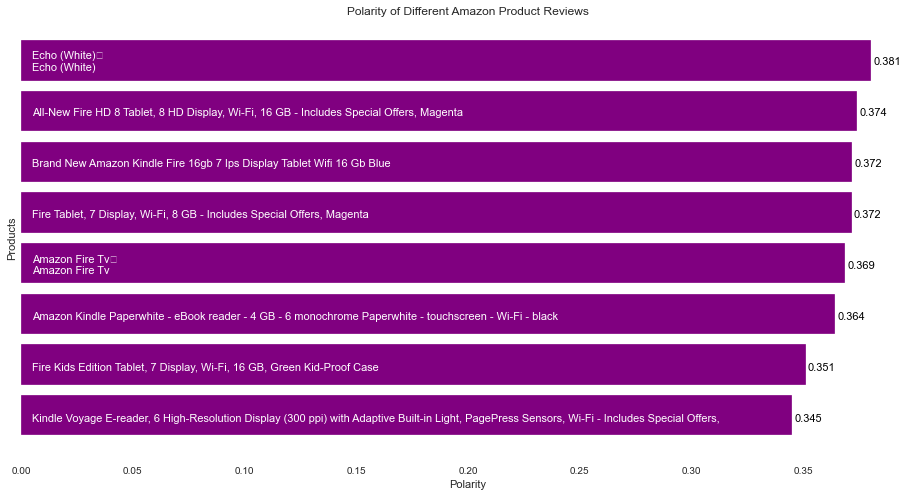

In [108]:
#Plotting Polarity of different products
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Recommend Percentage')

Text(0, 0.5, 'Products')

Text(0.5, 1.0, 'Percentage of reviewers recommended a product')

Text(0.5, 0.0, 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case')

Text(0.5, 1.0, 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')

Text(0.5, 2.0, 'Amazon Fire Tv\r\nAmazon Fire Tv')

Text(0.5, 3.0, 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue')

Text(0.5, 4.0, 'Echo (White)\r\nEcho (White)')

Text(0.5, 5.0, 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta')

Text(0.5, 6.0, 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,')

Text(0.5, 7.0, 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black')

Text(94.12715902322812, 0.0, '93.63')

Text(95.55564677978471, 1.0, '95.06')

Text(96.42402057776019, 2.0, '95.92')

Text(96.61650485436893, 3.0, '96.12')

Text(96.68181818181819, 4.0, '96.18')

Text(96.8041933191187, 5.0, '96.30')

Text(98.43103448275862, 6.0, '97.93')

Text(98.45340050377834, 7.0, '97.95')

([], [])

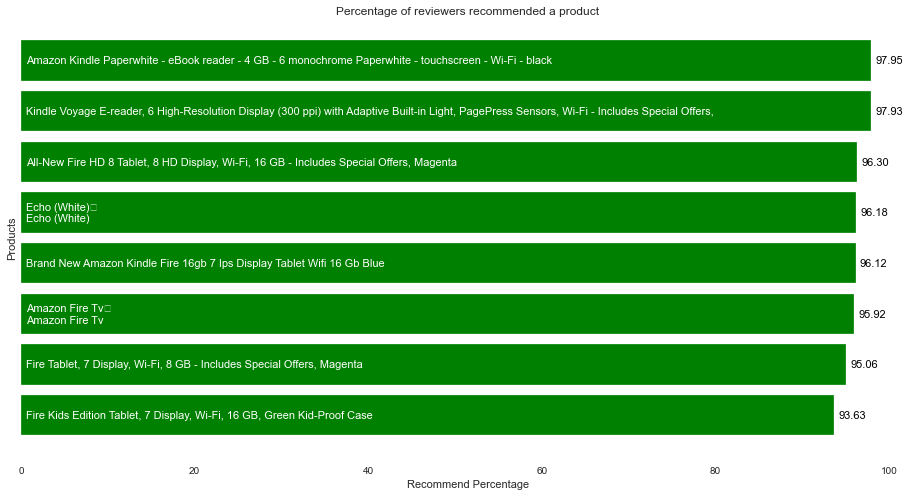

In [109]:
#Plotting recommendation of different products
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

In [113]:
#Checking readability of reviews


SyntaxError: invalid syntax (<ipython-input-113-58641b9bab0c>, line 2)

In [114]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [115]:
#Using textstat to determine readability, complexity and grade level of particular review
import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 8.211026422764224
Dale Chall Score of not upvoted reviews=> 6.5767804177959786
Flesch Reading Score of upvoted reviews=> 41.13657520325208
Flesch Reading Score of not upvoted reviews=> 67.77130282251612
Gunning Fog Index of upvoted reviews=> 23.7132825203252
Gunning Fog Index of not upvoted reviews=> 13.305156673576837


In [116]:
#Checking if upvoted and not upvoted reviews are easility understandable by people who completed certain grade school
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())


Text Standard of upvoted reviews=> 0    -1th and 0th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


In [117]:
#Checking reading time for a review (Average adults reads 250 words per minute)

df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())

#People find longer reviews helpful

Reading Time of upvoted reviews=> 3.3263414634146367
Reading Time of not upvoted reviews=> 1.729622069845325


In [ ]:
#conclusion from EDA on Amazon Product Revies

#Customers love products from Amazon. They find them a great purchase and easy to use
#Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product
#The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
#The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful
 